In [1]:
%matplotlib inline
import nest_asyncio
nest_asyncio.apply()

import multiprocessing
multiprocessing.set_start_method("fork")

import pickle
import os
import math
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import statsmodels
import arviz as az
import cmdstanpy
from cmdstanpy import cmdstan_path, CmdStanModel
import scipy

# 1. AR(p)
$$y_{t} = \mu + \sum_{i=1}^p \phi_{i} y_{t-i} + \epsilon_t $$

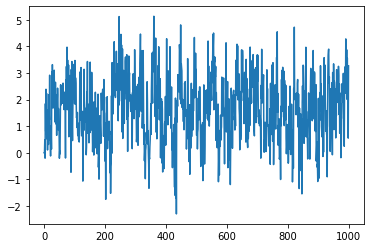

In [235]:
T = 1000
y = np.zeros(T)
p = 2
for i in range(T-p):
    y[i+p] = 0.5 + 0.3 * y[i+1] + 0.4 * y[i] + np.random.randn()

x = np.arange(T)
plt.plot(x,y);

In [236]:
data = {'T':T, 'y':y, 'P':p}

In [237]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

ar_p_stan = os.path.join(stan_path, 'ar_p.stan')
ar_p_model = CmdStanModel(stan_file=ar_p_stan)
ar_p_model.name
ar_p_model.stan_file
ar_p_model.exe_file
ar_p_model.code()

ar_p_fit = ar_p_model.sample(data=data, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:compiling stan file /Users/skim/Desktop/Code/git/stan-models/ar_p.stan to exe file /Users/skim/Desktop/Code/git/stan-models/ar_p
INFO:cmdstanpy:compiled model executable: /Users/skim/Desktop/Code/git/stan-models/ar_p
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [238]:
ar_p_arviz = az.from_cmdstanpy(
    posterior= ar_p_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'phi\n0'}>,
       <AxesSubplot:title={'center':'phi\n1'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

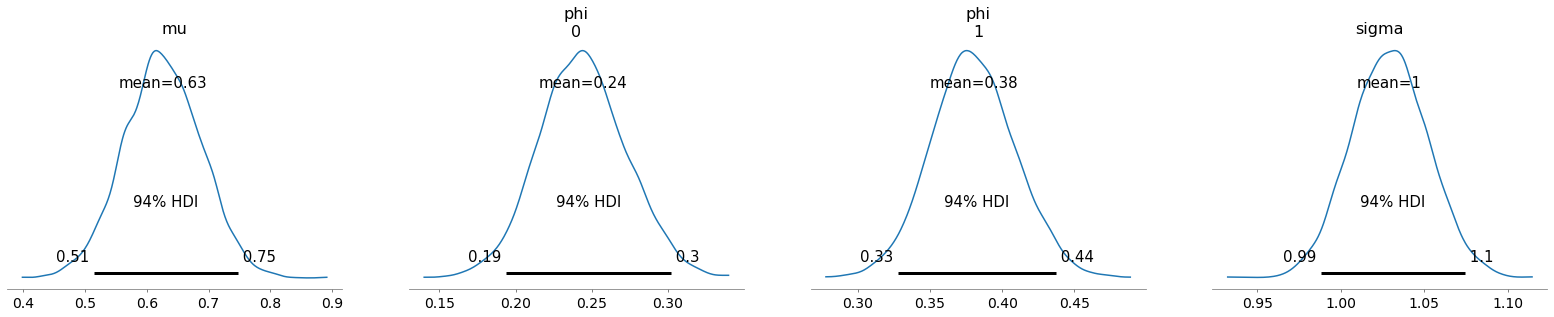

In [239]:
az.plot_posterior(ar_p_arviz, var_names=['mu', 'phi', 'sigma'])

# 2. MA(q)
$$y_{t} = \mu + \sum_{i=1}^q \theta_{i} \epsilon_{t-i} + \epsilon_t $$

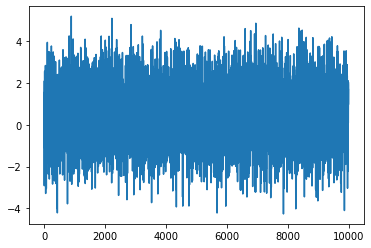

In [198]:
q = 2
T = 10000
mu = 0.5
y = np.zeros(T)
err_vec = np.zeros(T)
err_vec[0:q] = np.random.randn(q)
t1 = 0.8
t2 = 0.5
for j in range(q):
    y[j] = mu + t1 * err_vec[j-1] + t2 * err_vec[j-2] + err_vec[j]
err_vec[q:] = np.random.randn(T-q)

y[q:] = mu + t1 * err_vec[q-1:-1] + t2 * err_vec[q-2:-2] + err_vec[q:]

x = np.arange(T)
plt.plot(x,y);

In [199]:
data = {'T': T, 'y':y, 'Q':q}

In [200]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

ma_q_stan = os.path.join(stan_path, 'ma_q.stan')
ma_q_model = CmdStanModel(stan_file=ma_q_stan)
ma_q_model.name
ma_q_model.stan_file
ma_q_model.exe_file
ma_q_model.code()

ma_q_fit = ma_q_model.sample(data=data, iter_sampling=3000, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [201]:
ma_q_arviz = az.from_cmdstanpy(
    posterior= ma_q_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>], dtype=object)

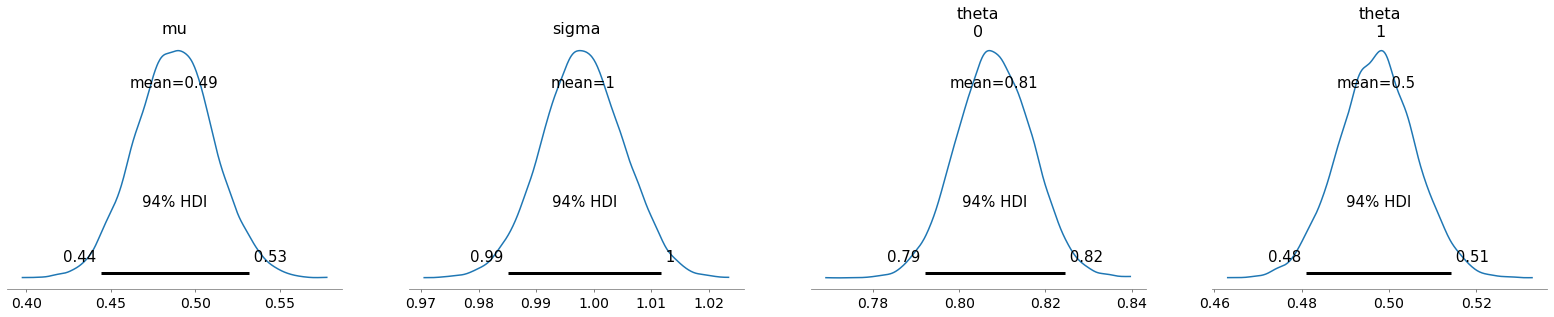

In [202]:
az.plot_posterior(ma_q_arviz, var_names = ['mu','sigma','theta'] )

# 3. ARMA(p,q)
$$ y_t = \mu + \sum_{i=1}^p \phi_{i} y_{t-i} + \sum_{j=1}^q \theta_j \epsilon_{t-j} + \epsilon_t $$ 

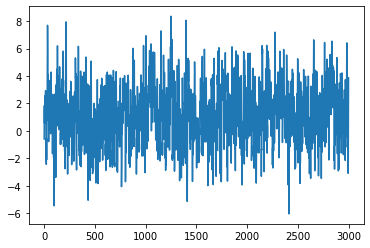

In [20]:
p = 1
q = 1
T = 3000
mu = 0.5
y = np.zeros(T)
p1 = 0.6
p2 = 0.3
t1 = 0.8
t2 = 0.3
err_vec = np.zeros(T)
err_vec[0:q] = np.random.randn(q)

for i in range(q): 
    y[i] = mu + p1 * y[i-1] + t1 * err_vec[i-1] + err_vec[i]


err_vec[q:] = np.random.randn(T-q)
for i in range(q,T):
    y[i] = mu + p1 * y[i-1] + t1 * err_vec[i-1] + err_vec[i]


# for i in range(q): 
#     y[i] = mu + p1 * y[i-1] + p2 * y[i-2] + t1 * err_vec[i-1] + t2 * err_vec[i-2]+err_vec[i]


# err_vec[q:] = np.random.randn(T-q)
# for i in range(q,T):
#     y[i] = mu + p1 * y[i-1] + p2 * y[i-2] + t1 * err_vec[i-1] + t2 * err_vec[i-2] + err_vec[i]

x = np.arange(T)
plt.plot(x,y);

In [21]:
data = {'T': T, 'y':y, 'Q':q, 'P':p}

In [22]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

arma_pq_stan = os.path.join(stan_path, 'arma_pq.stan')
arma_pq_model = CmdStanModel(stan_file=arma_pq_stan)
arma_pq_model.name
arma_pq_model.stan_file
arma_pq_model.exe_file
arma_pq_model.code()

arma_pq_fit = arma_pq_model.sample(data=data, iter_sampling=3000, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [23]:
arma_pq_arviz = az.from_cmdstanpy(
    posterior= arma_pq_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'phi\n0'}>,
       <AxesSubplot:title={'center':'theta\n0'}>], dtype=object)

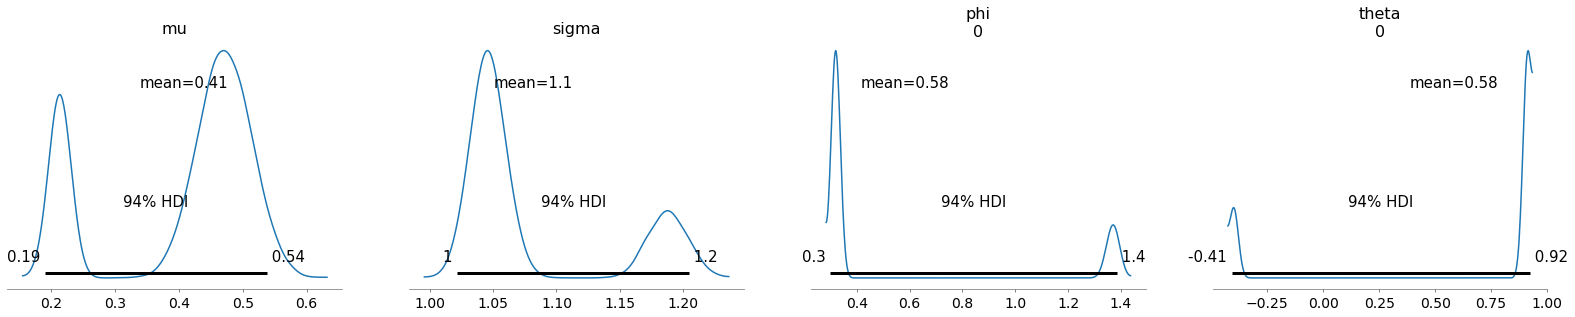

In [24]:
az.plot_posterior(arma_pq_fit, var_names = ['mu','sigma','phi','theta'] )

# 4. ARCH(q) 
Allows the scale of the noise to vary over time.\
AR(1) : models the mean of the series to change over time.\
ARCH(1) : models the scale of the noise to vary over time, mean is held fixed.
$$ r_t = \mu + a_t $$
$$ a_t = \sigma_t \epsilon_t $$
$$ \epsilon_t \sim normal(0,1) $$ 
$$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^p\alpha_i a_{t-i}^2$$ 
$r_t$ is the observed return

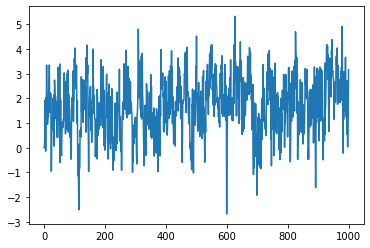

In [37]:
T = 1000
r = np.zeros(T)
# p = 2
for i in range(T-p):
    r[i+p] = 0.5 + 0.3 * r[i+1] + 0.4 * r[i] + np.random.randn()

x = np.arange(T)
plt.plot(x,r);

In [38]:
data = {'T':T, 'r':r}

In [42]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

arch_p_stan = os.path.join(stan_path, 'arch_p.stan')
arch_p_model = CmdStanModel(stan_file=arch_p_stan)
arch_p_model.name
arch_p_model.stan_file
arch_p_model.exe_file
arch_p_model.code()

arch_p_fit = arch_p_model.sample(data=data, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:compiling stan file /Users/skim/Desktop/Code/git/stan-models/arch_p.stan to exe file /Users/skim/Desktop/Code/git/stan-models/arch_p
INFO:cmdstanpy:compiled model executable: /Users/skim/Desktop/Code/git/stan-models/arch_p
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [43]:
arch_p_arviz = az.from_cmdstanpy(
    posterior= arch_p_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'alpha0'}>,
       <AxesSubplot:title={'center':'alpha1'}>], dtype=object)

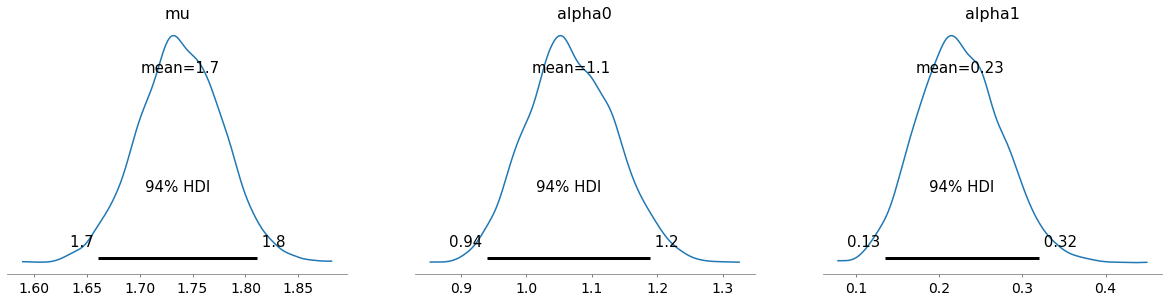

In [44]:
az.plot_posterior(arch_p_arviz, var_names=['mu', 'alpha0', 'alpha1'])

# 5. GARCH(1,1)
$$ r_t = \mu + a_t $$
$$ a_t = \sigma_t \epsilon_t $$
$$ \epsilon_t \sim normal(0,1) $$ 
$$ \sigma_t^2 = \alpha_0 + \sum_{i=1}^p\alpha_i a_{t-i}^2 +  \sum_{i=j}^q\beta_j \sigma_{t-j}^2$$ 
$r_t$ is the observed return

In [45]:
sigma1 = .5
data = {'T':T, 'r':r, 'sigma1' : sigma1}

In [46]:
stan_path = str('/Users/skim/Desktop/Code/git/stan-models')

garch_pq_stan = os.path.join(stan_path, 'garch_pq.stan')
garch_pq_model = CmdStanModel(stan_file=garch_pq_stan)
garch_pq_model.name
garch_pq_model.stan_file
garch_pq_model.exe_file
garch_pq_model.code()

garch_pq_fit = garch_pq_model.sample(data=data, show_progress =True, output_dir='/Users/skim/Desktop/Code/git/stan-models/output')

INFO:cmdstanpy:compiling stan file /Users/skim/Desktop/Code/git/stan-models/garch_pq.stan to exe file /Users/skim/Desktop/Code/git/stan-models/garch_pq
INFO:cmdstanpy:compiled model executable: /Users/skim/Desktop/Code/git/stan-models/garch_pq
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [47]:
garch_pq_arviz = az.from_cmdstanpy(
    posterior= garch_pq_fit,
    observed_data={"y": y},
    log_likelihood="log_lik"
)

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'alpha0'}>,
       <AxesSubplot:title={'center':'alpha1'}>,
       <AxesSubplot:title={'center':'beta1'}>], dtype=object)

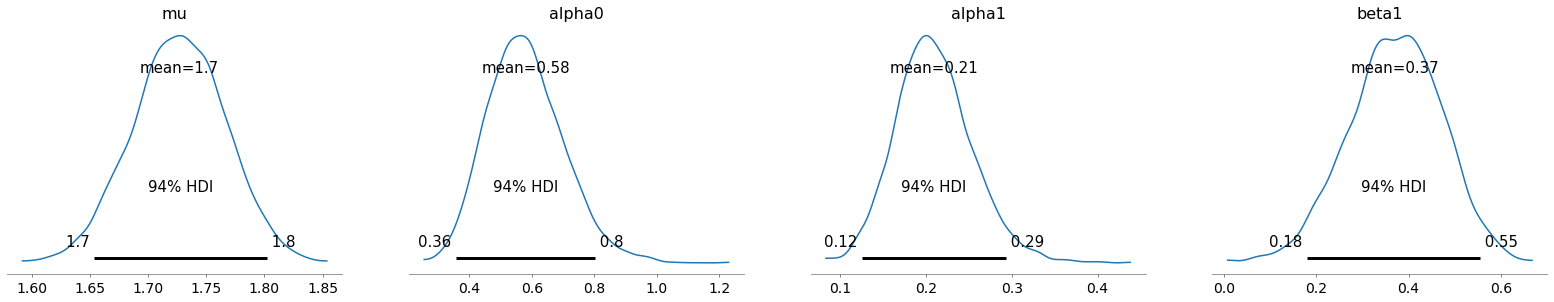

In [48]:
az.plot_posterior(garch_pq_arviz, var_names=['mu', 'alpha0', 'alpha1','beta1'])

# 6. HMM
$K$ hidden states $: z_t \in \{1,\cdots,K\}$, state sequence has the Markov property, parameterised by the transition matrix $\theta$, where $\theta_k$ is the K-simplex(prob dist.) for k.\
The probability of transitioning from state $z_{t-1}$ to $z_t$ is :
$ z_t \sim $ categorical $(\theta_{z[t-1]})$.\
Output $y_t$ at $t$ depends on the current hidden state, $z_t$.